In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from myMLlib import load_data_list

In [3]:
folderpath= ('/home/yuqster/files/research/dataset/New_bloodmeat10','/home/yuqster/files/research/dataset/New_bloodmeat15',
             '/home/yuqster/files/research/dataset/New_bloodmeat16')

data_list = []
labels = []
material = ['blood','meat']

In [4]:
data_list,labels = load_data_list(folderpath,material, 3e4)

In [5]:
X,y = [],[]
for i in range(len(folderpath)):
    X.append(np.array(data_list[i]))
    y.append(np.array(labels[i]))

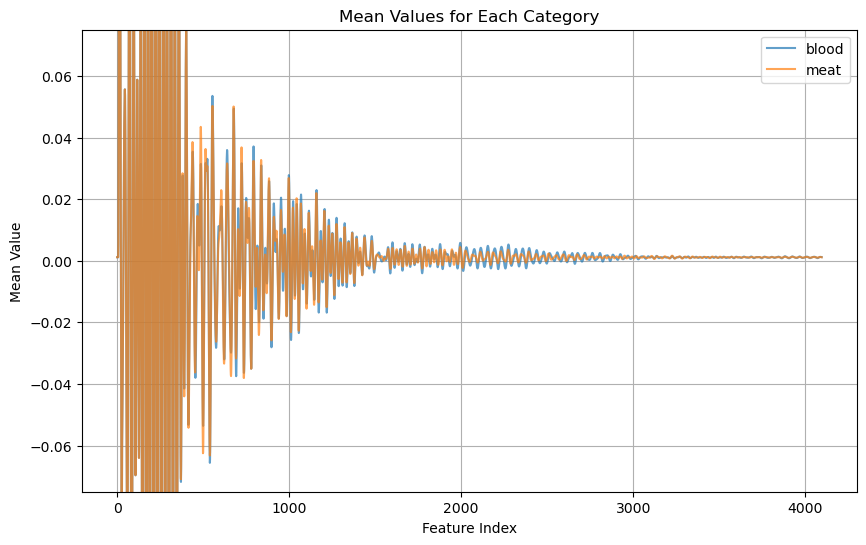

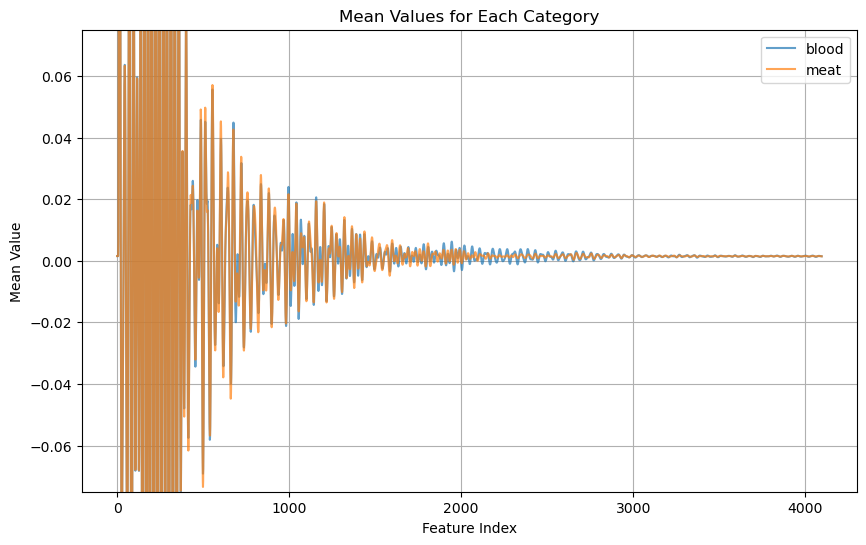

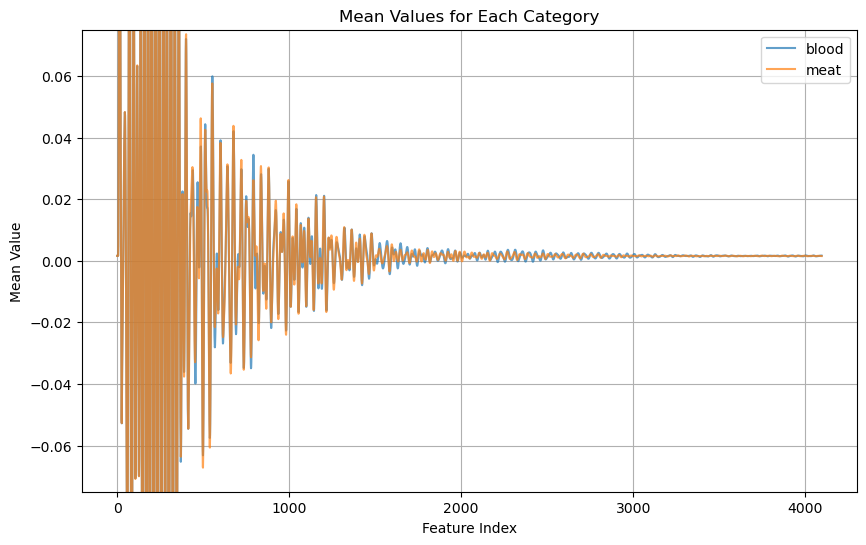

In [9]:
unique_labels = np.unique(labels[0])
indices = []

for k in range(len(folderpath)):
    indices.append({})
    plt.figure(figsize=(10,6))
    plt.ylim([-0.075,0.075])
    for i,label in enumerate(unique_labels):
        # 获取当前类别下的样本索引
        indices[k][material[i]] = np.where(y[k].flatten() == label)
        # 计算当前类别 X 中所有样本的特征均值（按列均值）
        mean_values = X[k][indices[k][material[i]]].mean(axis=0)
        # 绘制均值曲线
        plt.plot(mean_values, label=f"{material[int(label)]}",alpha = 0.7)
    plt.xlabel("Feature Index")
    plt.ylabel("Mean Value")
    plt.title("Mean Values for Each Category")
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
# 仅读取 CSV 中第二列（索引从 0 开始，所以第二列索引为 1）
time = pd.read_csv(f'{folderpath[0]}/time_vector.csv', usecols=[1]).squeeze()

fft = []
for i in range(len(folderpath)):
    fft.append({})
    fft[i]["blood"] = np.fft.fft(X[i][indices[i]['blood']], axis=1).mean(axis = 0)

    fft[i]["meat"] = np.fft.fft(X[i][indices[i]['meat']], axis=1).mean(axis = 0)
# 对 FFT 结果取幅值，再沿 axis=0 计算均值
freqency = np.fft.fftfreq(len(fft[0]['blood']), d = (time.iloc[-1] - time.iloc[0])/len(time))
mask = freqency >= 0


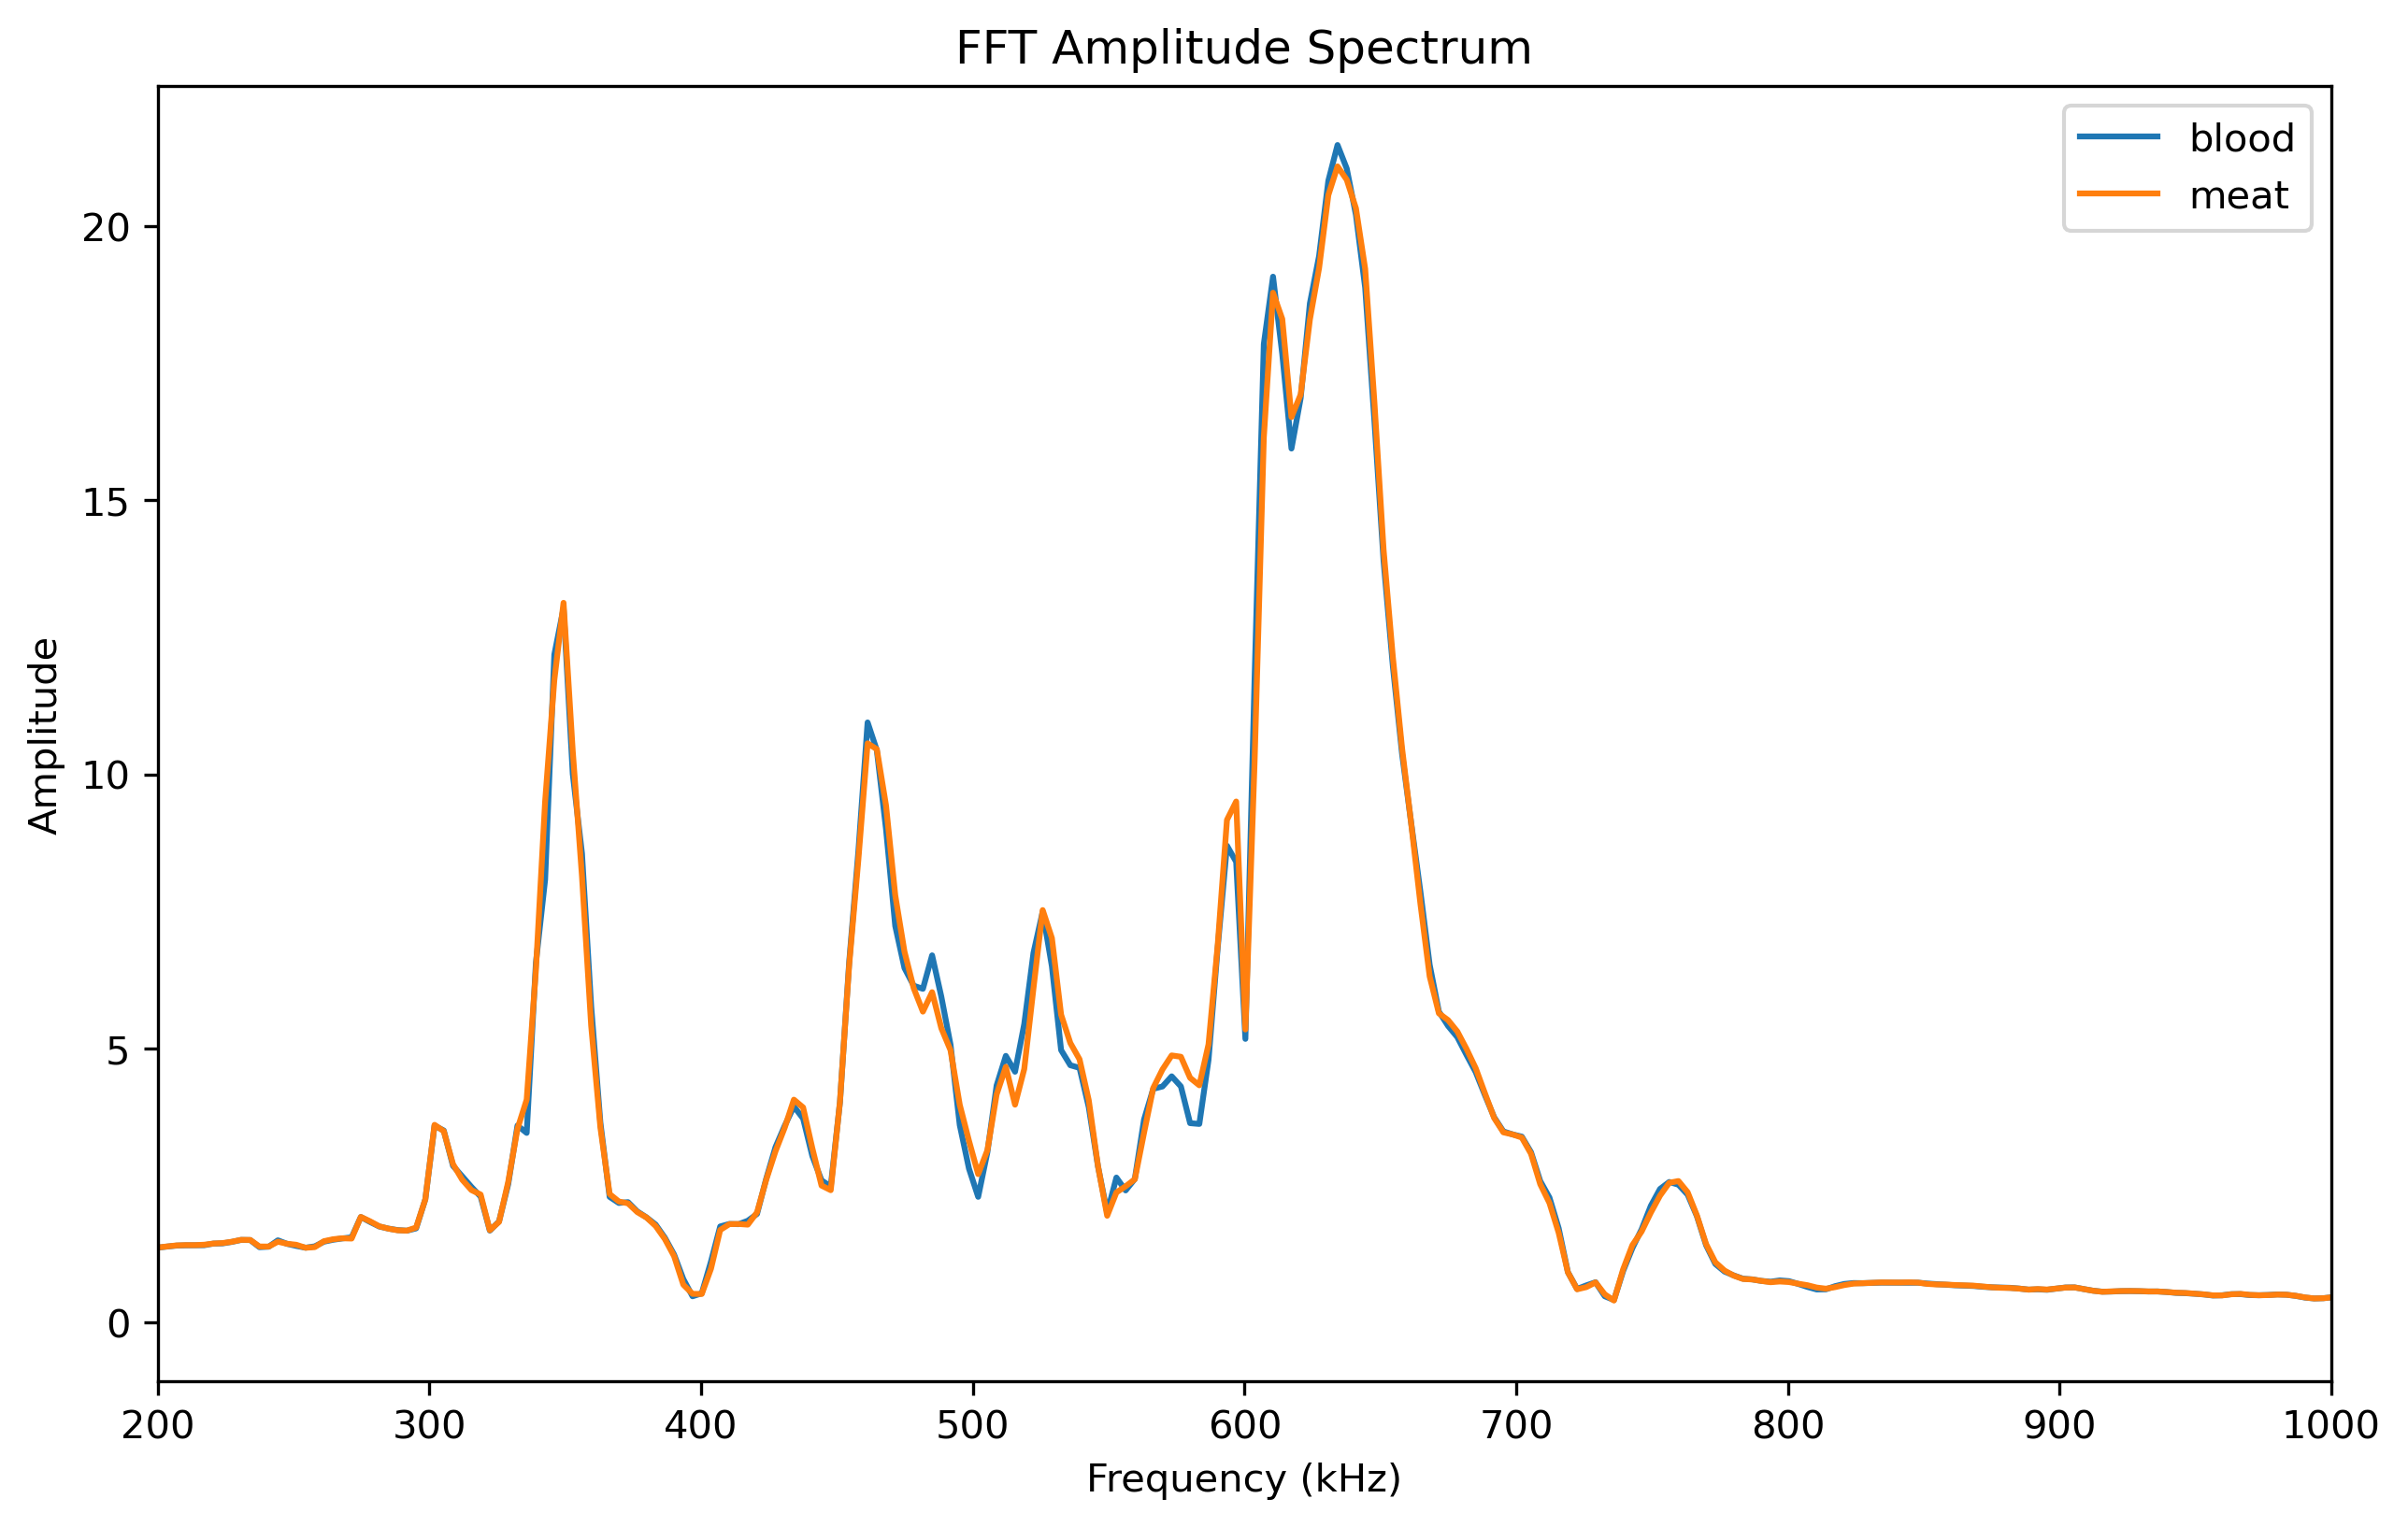

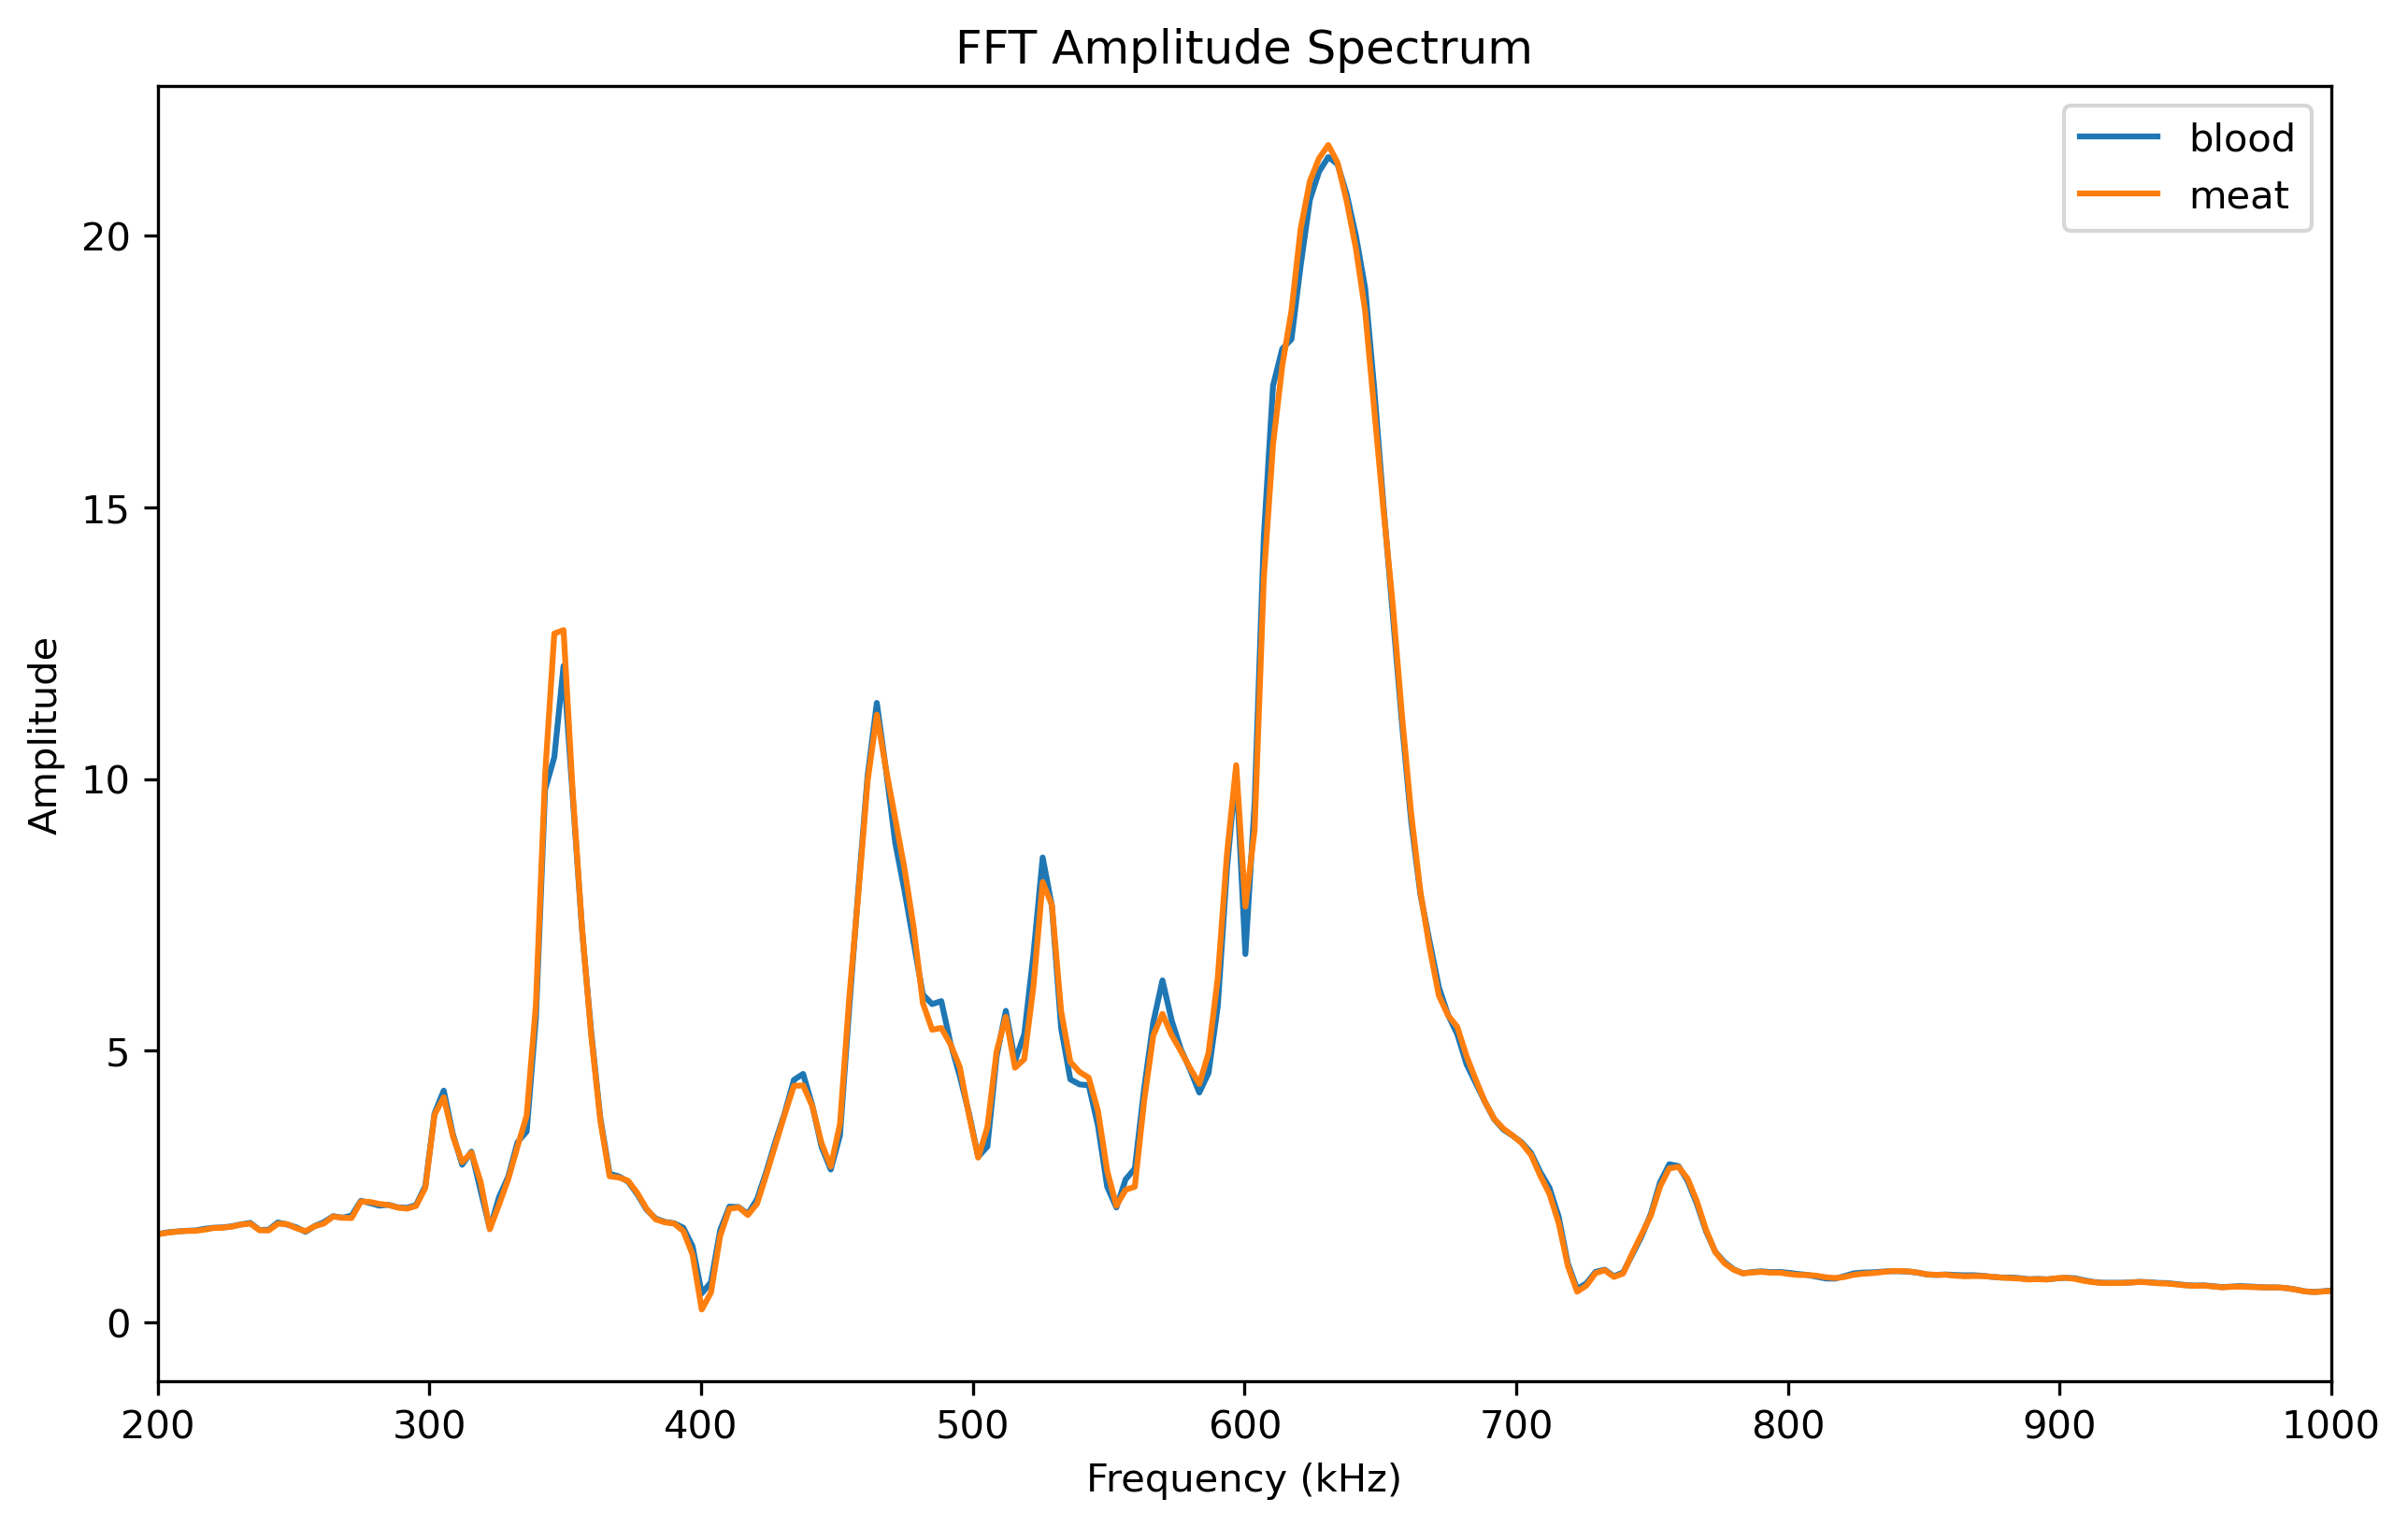

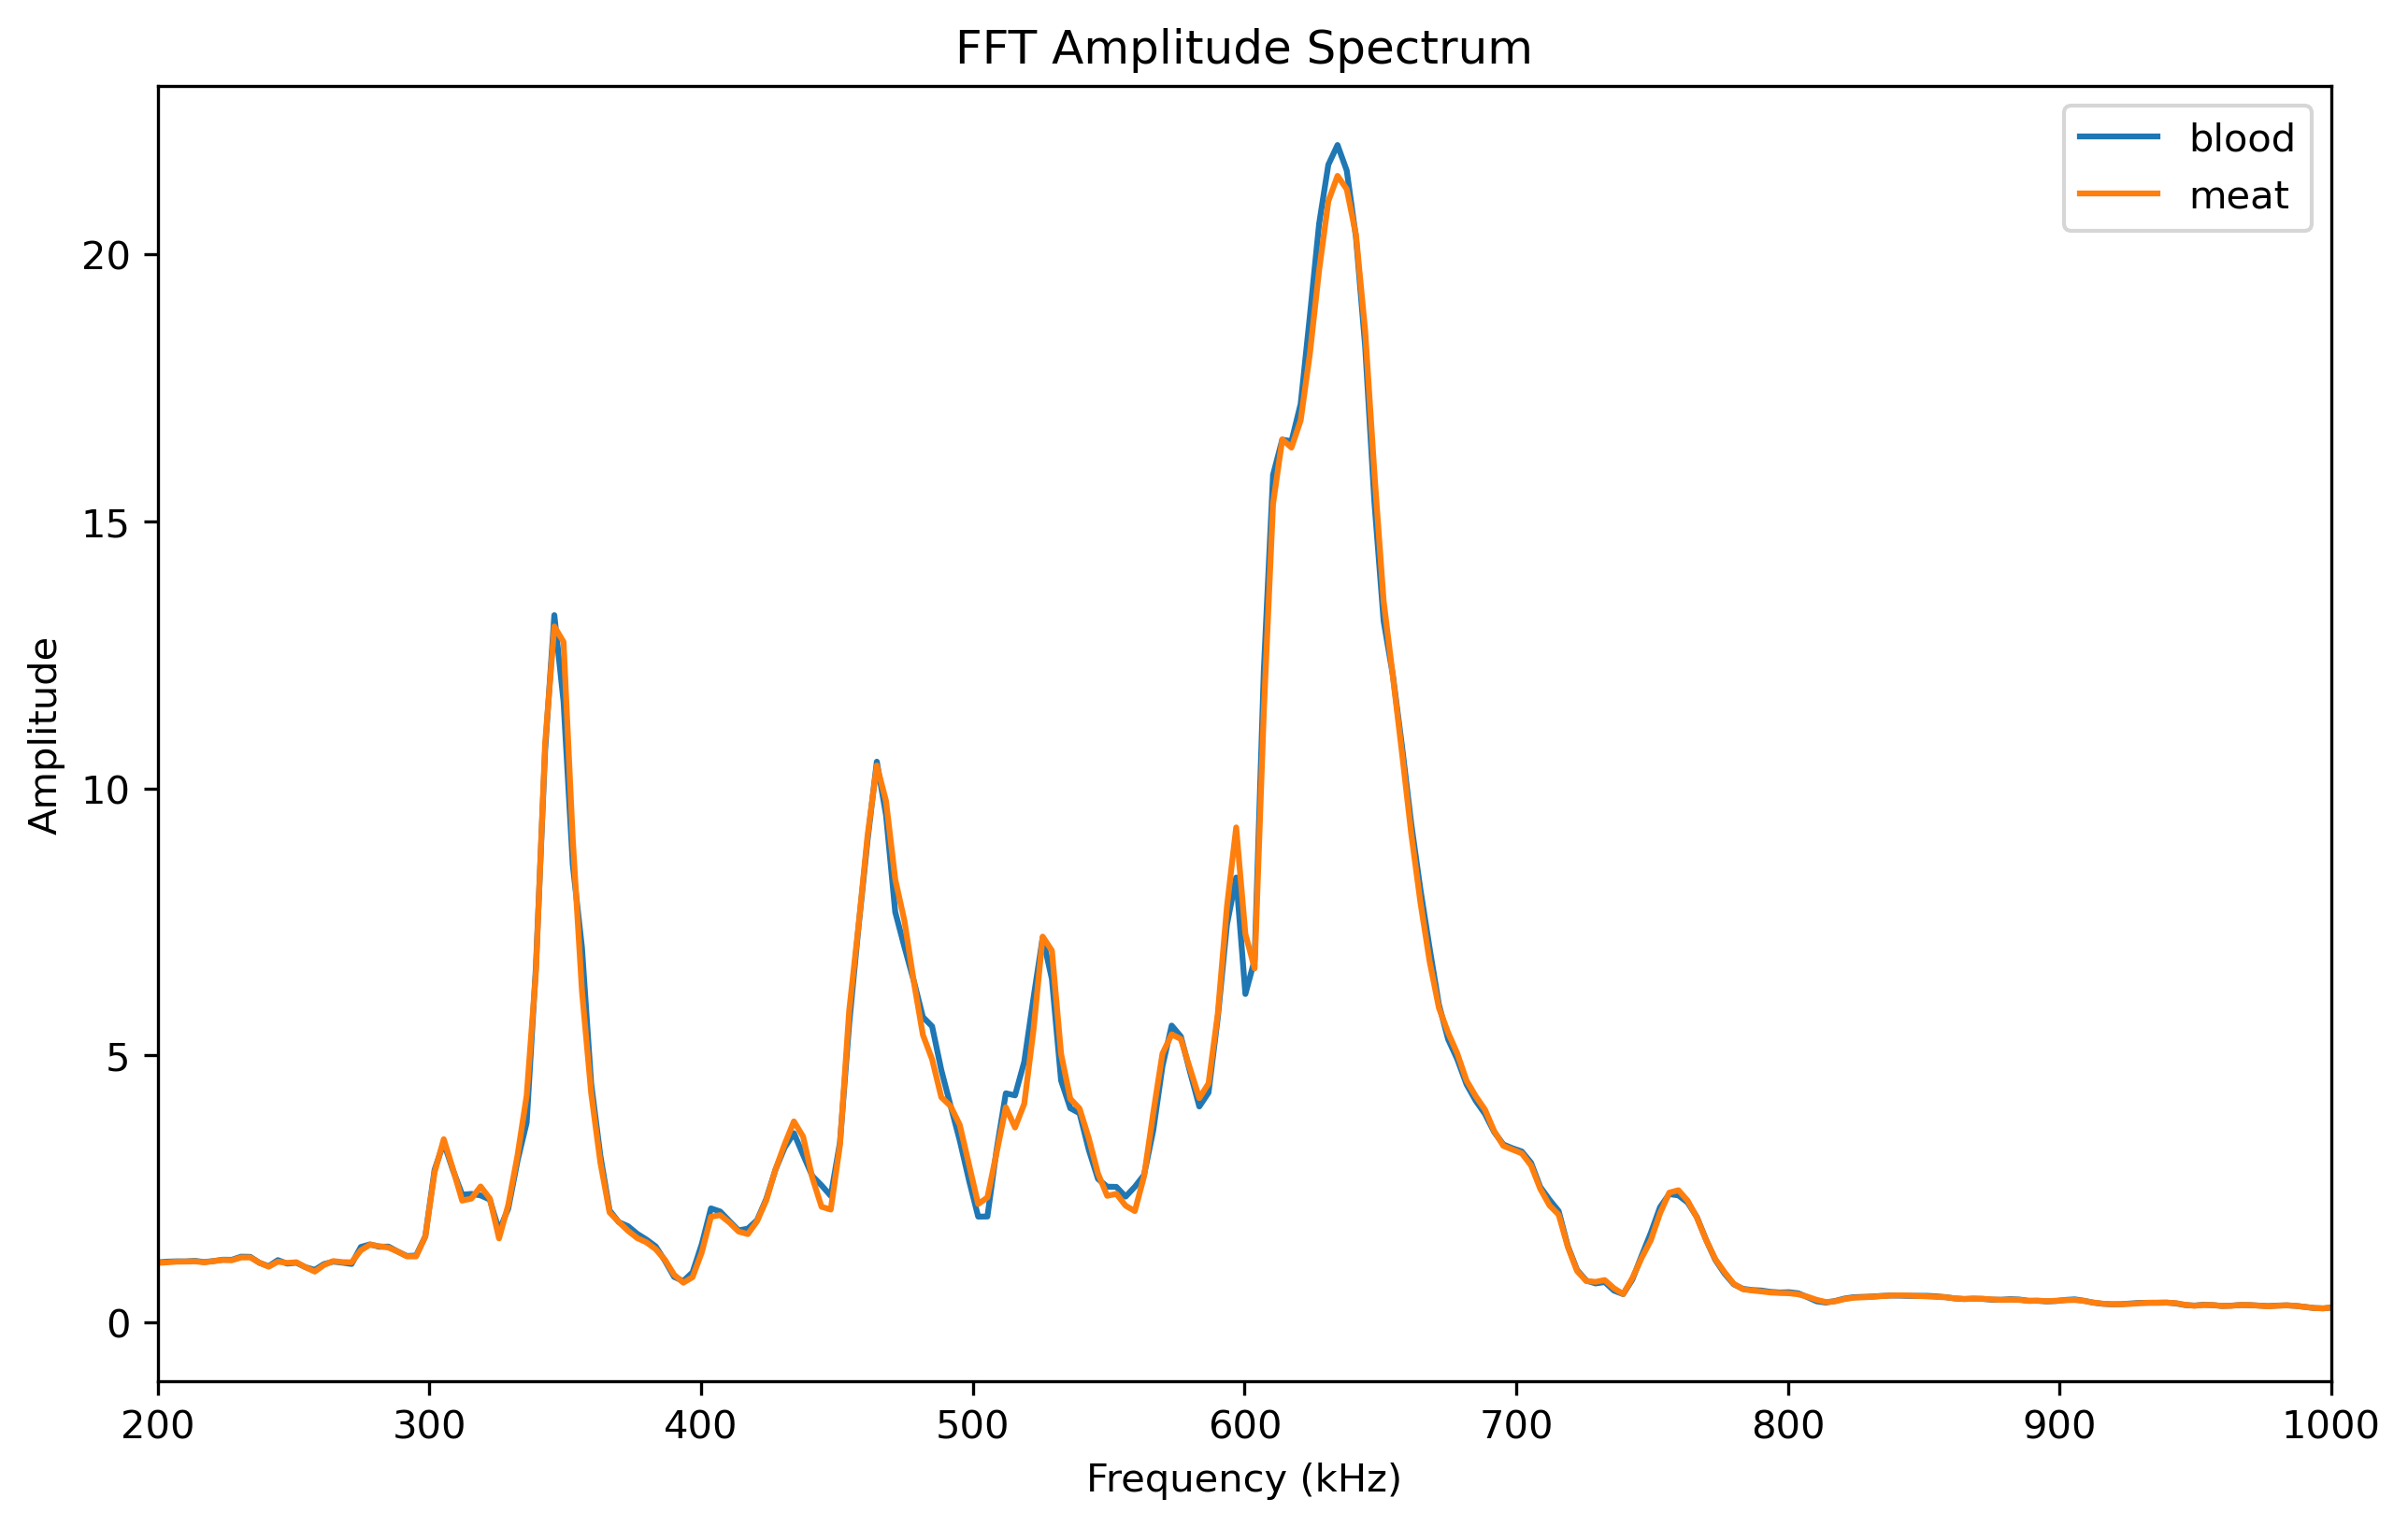

In [8]:
for i in range(len(folderpath)):
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(freqency[mask]*1e-3, np.abs(fft[i]['blood'][mask]),label = 'blood')
    plt.plot(freqency[mask]*1e-3, np.abs(fft[i]['meat'][mask]),label = 'meat')
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Amplitude")
    plt.title("FFT Amplitude Spectrum")
    plt.xlim(200,1e3)
    plt.legend()
    plt.show()